## Description

Create a regression or classification machine learning model on Kaggle or your own dataset.

## Requirements

1. Do exploratory data analysis.
2. Do feature engineering.
3. Do feature preprocessing.
4. Build a machine learning model.
5. Explore your model results.

## Bonus Points

- Move your final model to a Python module.
- Compare multiple machine learning models.
- Do hyperparameter tuning.
- Deploy the model on your own machine.
- Deploy the model on external service.

## Suggestions

- Use scikit-learn for creating models.
- Use one of these datasets:
    - Titanic: Machine Learning from Disaster ([https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic))
    - House Prices: Advanced Regression Techniques ([https://www.kaggle.com/c/house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques))
    - WHO Suicide Statistics ([https://www.kaggle.com/szamil/who-suicide-statistics](https://www.kaggle.com/szamil/who-suicide-statistics))
    - Rain in Australia ([https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package))
    - FIFA 19 complete player dataset ([https://www.kaggle.com/karangadiya/fifa19](https://www.kaggle.com/karangadiya/fifa19))
    - FIFA 18 Complete Player Dataset ([https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset))
    - Black Friday ([https://www.kaggle.com/mehdidag/black-friday](https://www.kaggle.com/mehdidag/black-friday))
    - Graduate Admissions ([https://www.kaggle.com/mohansacharya/graduate-admissions](https://www.kaggle.com/mohansacharya/graduate-admissions))
    - Red Wine Quality ([https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009))
    - Life Expectancy (WHO) ([https://www.kaggle.com/kumarajarshi/life-expectancy-who](https://www.kaggle.com/kumarajarshi/life-expectancy-who))
    - California Housing Prices ([https://www.kaggle.com/camnugent/california-housing-prices](https://www.kaggle.com/camnugent/california-housing-prices))
    - Heart Disease UCI ([https://www.kaggle.com/ronitf/heart-disease-uci](https://www.kaggle.com/ronitf/heart-disease-uci))

## Expected Outcome

- Jupyter notebook.


## Definitions 

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

data is discrete the results are 0 and 1 , meaning survival or death = classification model

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
random_state = 11
%matplotlib inline

In [4]:
!unzip -qq titanic.zip -d ./titanic_data

In [2]:
print(os.listdir('./'))

['.ipynb_checkpoints', '120-years-of-olympic-history-athletes-and-results.zip', 'advertising.csv', 'AI 10 Tabular data analysis.ipynb', 'AI 11 Expert level python .ipynb', 'AI 12 Kaggle.ipynb', 'AI 13 Kaggle 2.ipynb', 'AI 2.ipynb', 'AI 5 Numpy.ipynb', 'AI 6 list comprehensions and standart library.ipynb', 'AI 7.ipynb', 'AI 8 Numpy 2.ipynb', 'AI 9 .ipynb', 'athlete_events.csv', 'attempt ML project titanic.ipynb', 'data', 'Data project.ipynb', 'data2', 'data3', 'data5', 'dogs.pickle', 'Hangman_game.ipynb', 'kyphosis.csv', 'Lecture 5.ipynb', 'ML 1 linear regression with continuos variables.ipynb', 'ML 2,3 logistic regression .ipynb', 'ML Notes.ipynb', 'noc_regions.csv', 'tic tac toe 1.ipynb', 'titanic.zip', 'titanic_data', 'toai_bootcamp-master', 'USA_Housing.csv', 'World hapiness test.ipynb', 'world-happiness-report-2019.zip', 'world-happiness-report.zip', 'youtube-new.zip']


In [3]:
!ls titanic_data

gender_submission.csv  test.csv  train.csv


In [3]:
gender_data = pd.read_csv('./titanic_data/gender_submission.csv',low_memory = False)
test_data = pd.read_csv('./titanic_data/test.csv',low_memory = False)
train_data = pd.read_csv('./titanic_data/train.csv',low_memory = False)

In [4]:
train_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
train_data.info()
"""missing values in age, Cabin, Embarked"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


'missing values in age, Cabin, Embarked'

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
train_data = train_data.drop(['Ticket','Cabin'], axis=1)
'''remove NaN and unimportant values from data'''

'remove NaN and unimportant values from data'

In [11]:
test_data = test_data.drop(['Ticket','Cabin'], axis=1)

In [12]:
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)





In [13]:
print(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


In [14]:
train_data['Embarked'].fillna(train_data['Embarked'].mode,inplace =True)

In [15]:
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


In [16]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

In [17]:
train_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


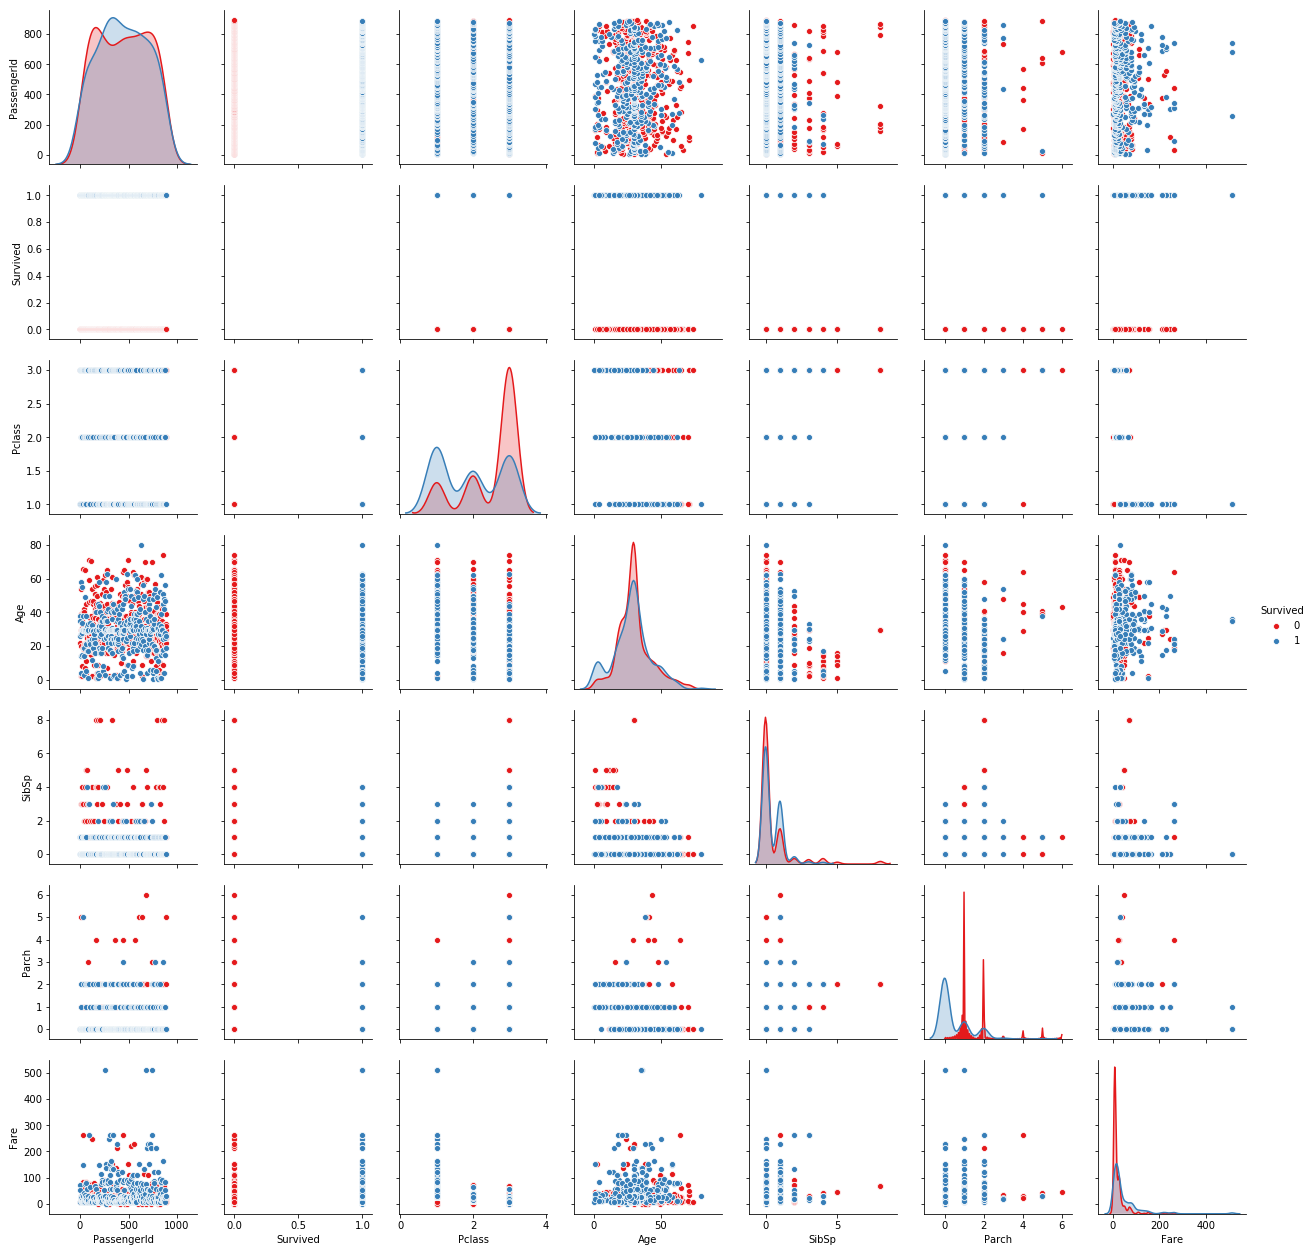

In [18]:
sns.pairplot(train_data,hue='Survived',palette='Set1')

'survived vs. fare = positive corr\n    survived vs. parch = positive ccorr\n\n'

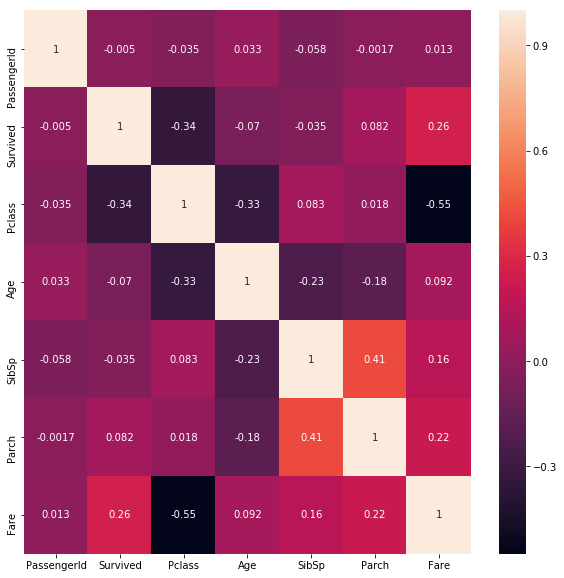

In [21]:
data = plt.subplots(figsize=(10, 10)) 
sns.heatmap(train_data.corr(),annot=True)
'''survived vs. fare = positive corr
    survived vs. parch = positive ccorr

'''


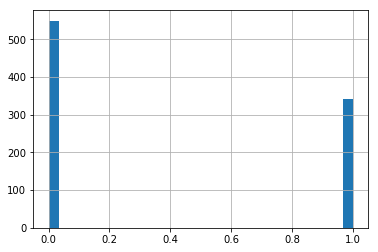

In [22]:
data=train_data['Survived'].hist(bins = 30)

<Figure size 720x360 with 0 Axes>

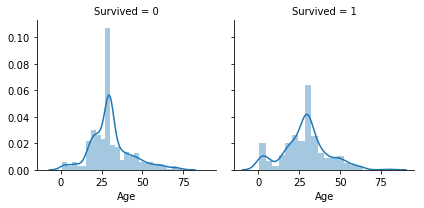

In [23]:
plt.figure(figsize = (10, 5))
data=sns.FacetGrid(train_data, col='Survived')
data=data.map(sns.distplot, "Age")

Text(0.5, 1.0, 'survival age distribution')

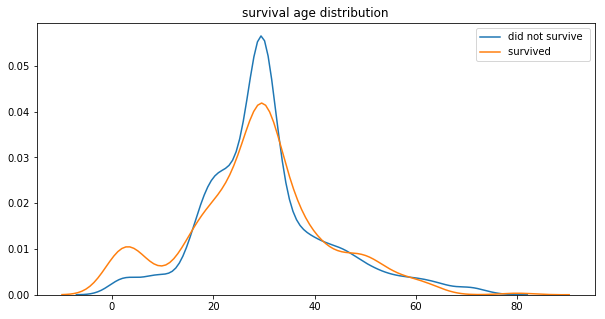

In [24]:
plt.figure(figsize = (10, 5))

data = train_data[['Survived', 'Age']]
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], label = 'did not survive ')
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], label = 'survived ')
plt.title('survival age distribution')



In [25]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')


Text(0.5, 1.0, 'male vs female survival rates')

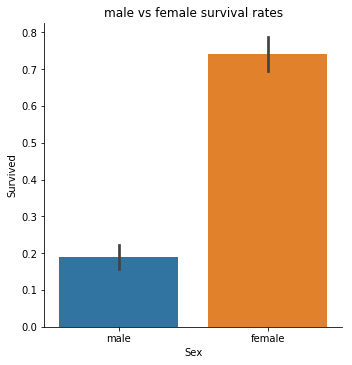

In [26]:
data= sns.catplot(x="Sex", y="Survived", data=train_data,kind="bar")
plt.title('male vs female survival rates')

Text(0.5, 1.0, 'how is survival rate correlated with siblings / spouses aboard the Titanic')

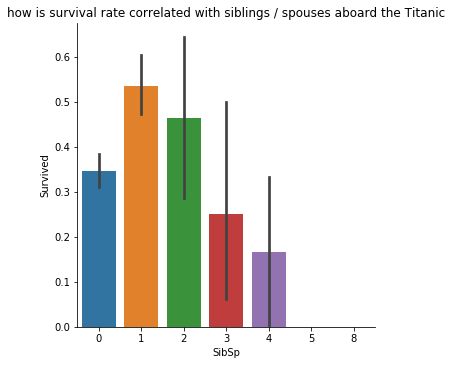

In [27]:
data= sns.catplot(x="SibSp", y="Survived", data=train_data,kind="bar")
plt.title('how is survival rate correlated with siblings / spouses aboard the Titanic')

Text(0.5, 1.0, 'how is survival rate correlated with number of parents / children aboard the Titanic')

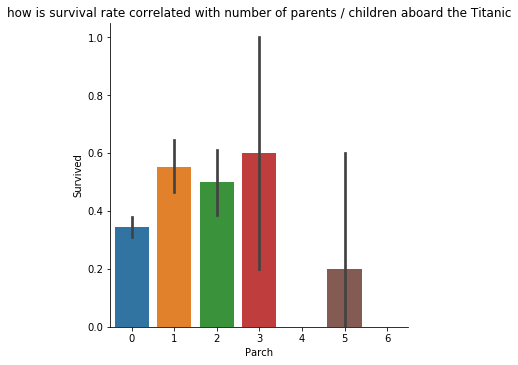

In [28]:
data= sns.catplot(x="Parch", y="Survived", data=train_data,kind="bar")
plt.title('how is survival rate correlated with number of parents / children aboard the Titanic')

In [29]:
data= sns.catplot(x="Embarked", y="Survived", data=train_data,kind="bar")
plt.title('how is survival rate correlated with ')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

## change strings to integers

In [105]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

#pandas get dummies



## Linear regression

In [31]:
print(train_data.shape)
print(test_data.shape)

(891, 10)
(418, 9)


In [26]:
from sklearn.model_selection import train_test_split


In [23]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')


In [52]:
features = train_data[
    [  'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'
     
    ]
    
]
target = train_data['Survived']

In [53]:
train_test_split(features, target, test_size=0.2,random_state=random_state)

[     Pclass  Sex        Age  SibSp  Parch      Fare
 333       3    2  16.000000      2      0   18.0000
 662       1    2  47.000000      0      0   25.5875
 382       3    2  32.000000      0      0    7.9250
 331       1    2  45.500000      0      0   28.5000
 149       2    2  42.000000      0      0   13.0000
 664       3    2  20.000000      1      0    7.9250
 563       3    2  29.699118      0      0    8.0500
 41        2    1  27.000000      1      0   21.0000
 292       2    2  36.000000      0      0   12.8750
 773       3    2  29.699118      0      0    7.2250
 631       3    2  51.000000      0      0    7.0542
 355       3    2  28.000000      0      0    9.5000
 761       3    2  41.000000      0      0    7.1250
 791       2    2  16.000000      0      0   26.0000
 11        1    1  58.000000      0      0   26.5500
 667       3    2  29.699118      0      0    7.7750
 143       3    2  19.000000      0      0    6.7500
 587       1    2  60.000000      1      1   7

In [54]:
train_features, test_features, train_targets, test_targets = train_test_split(
features, target ,test_size = 0.2, random_state = random_state)

In [55]:
for x in (train_features, test_features, train_targets, test_targets):
    print(x.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(train_features, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
model.intercept_

1.7958351805297388

In [60]:
model.coef_

array([-1.76260008e-01, -4.96483887e-01, -5.35982027e-03, -4.15028462e-02,
       -1.58235322e-02,  2.66172818e-04])

In [61]:
model.predict(test_features.head(3))

array([0.57417187, 0.13167796, 0.11696384])

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
test_predictions = model.predict(test_features)

In [64]:
mean_absolute_error(test_targets,test_predictions)

0.2688875568940532

In [65]:
mean_squared_error(test_targets,test_predictions)

0.11738618499983335

In [66]:
test_rmse = np.sqrt(mean_squared_error(test_targets,test_predictions))

In [67]:
test_rmse

0.34261667355783104

In [68]:
model.score(test_features,test_targets)
#wtf

0.47747002589890825

## Decision trees & random forests

In [54]:
[x.shape for x in (train_data, test_data, train_targets, test_targets)]

[(891, 10), (418, 9), (712,), (179,)]

In [59]:
from sklearn.model_selection import train_test_split


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
train_test_split(features, target, test_size=0.2,random_state=random_state)

In [50]:
dtree = DecisionTreeClassifier()

In [69]:
dtree.fit(train_features,train_targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
test_predict = dtree.predict(test_features)

In [84]:
print(classification_report(test_targets,test_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       118
           1       0.71      0.72      0.72        61

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179



In [89]:
print(confusion_matrix(test_targets,test_predict))

[[100  18]
 [ 17  44]]


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(n_estimators=100)

In [104]:
rfc.fit(train_features,train_targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
print(classification_report(test_targets,test_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       118
           1       0.71      0.72      0.72        61

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179



In [107]:
rfc.predict(test_data)

ValueError: could not convert string to float: 'Kelly, Mr. James'